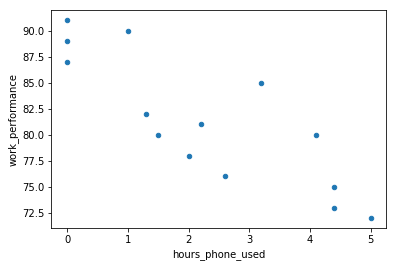

In [2]:
#Ch16_2_1
import pandas as pd

hours_phone_used = [0,0,0,1,1.3,1.5,2,2.2,2.6,3.2,4.1,4.4,4.4,5]
work_performance = [87,89,91,90,82,80,78,81,76,85,80,75,73,72]

df = pd.DataFrame({"hours_phone_used":hours_phone_used,
                   "work_performance":work_performance})

df.plot(kind="scatter", x="hours_phone_used", y="work_performance")

In [4]:
#Ch16_2_2
import pandas as pd

hours_phone_used = [0,0,0,1,1.3,1.5,2,2.2,2.6,3.2,4.1,4.4,4.4,5]
work_performance = [87,89,91,90,82,80,78,81,76,85,80,75,73,72]

df = pd.DataFrame({"hours_phone_used":hours_phone_used,
                   "work_performance":work_performance})
print(df.corr())  #correlation 計算相關係數
#df.corr().to_html("Ch16_2_2.html")

                  hours_phone_used  work_performance
hours_phone_used          1.000000         -0.838412
work_performance         -0.838412          1.000000


In [5]:
#Ch16_4_1
import pandas as pd

# 匯入CSV格式的檔案
df = pd.read_csv("C:\\Users\\11004076\\Documents\\Python Scripts\\FT748\\Ch16\\tutsplus.csv", encoding="utf8")

print(df.info())

print(df.head())
#df.head().to_html("Ch16_4_1.html")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3582 entries, 0 to 3581
Data columns (total 4 columns):
author      3582 non-null object
category    3582 non-null object
date        3582 non-null object
title       3582 non-null object
dtypes: object(4)
memory usage: 112.1+ KB
None
            author          category         date  \
0    Jeremy McPeak    Cloud Services  16 Aug 2018   
1       Sajal Soni               PHP  16 Aug 2018   
2     Esther Vaati        Angular 2+  15 Aug 2018   
3  Chike Mgbemena        Android SDK  14 Aug 2018   
4  Andrew Blackman  Machine Learning  14 Aug 2018   

                                               title  
0             Get Started With Pusher: Client Events  
1  How to Do User Authentication With the Symfony...  
2  How to Deploy an App to Firebase With Angular CLI  
3  Android Architecture Components: Using the Pag...  
4  New Course: Machine Learning With Google Tenso...  


WordPress          251
Web Development    240
News               233
PHP                204
Android SDK        182
HTML & CSS         144
JavaScript         144
Python             122
Roundups           118
ActionScript       108
Name: category, dtype: int64


Text(0.5, 1.0, 'Top 10 Categories')

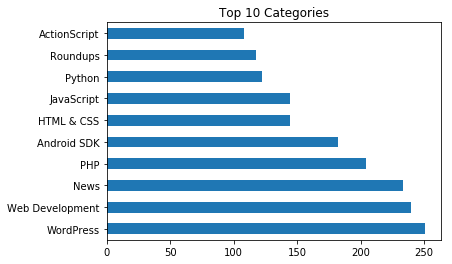

In [6]:
#Ch16_4_1a
import pandas as pd
import matplotlib.pyplot as plt

# 匯入CSV格式的檔案
df = pd.read_csv("C:\\Users\\11004076\\Documents\\Python Scripts\\FT748\\Ch16\\tutsplus.csv", encoding="utf8")

print(df["category"].value_counts().head(10))  #各類別的教學項目的計數(取頭十名)

df["category"].value_counts().head(10).plot(kind="barh")
plt.title("Top 10 Categories")

Jeffrey Way        361
Andrew Blackman    160
Jeff Reifman       106
Monty Shokeen       94
Carlos Yanez        81
Name: author, dtype: int64


Text(0.5, 1.0, 'Top 5 Authors')

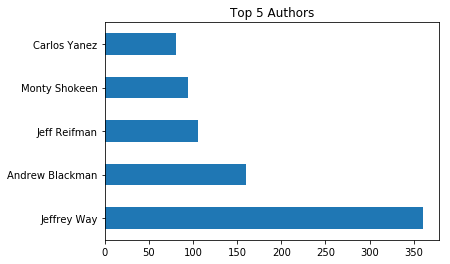

In [7]:
#Ch16_4_1b
import pandas as pd
import matplotlib.pyplot as plt

# 匯入CSV格式的檔案
df = pd.read_csv("C:\\Users\\11004076\\Documents\\Python Scripts\\FT748\\Ch16\\tutsplus.csv", encoding="utf8")

print(df["author"].value_counts().head(5)) ##各作者的計數(取頭五名)

df["author"].value_counts().head(5).plot(kind="barh")
plt.title("Top 5 Authors")

In [8]:
#Ch16_4_1c
import pandas as pd
import dateparser

# 匯入CSV格式的檔案
df = pd.read_csv("C:\\Users\\11004076\\Documents\\Python Scripts\\FT748\\Ch16\\tutsplus.csv", encoding="utf8")

df["date"] = df["date"].apply(dateparser.parse)
df.to_csv("tutsplus2.csv", index=False, encoding="utf8")
print("存入tutsplus2.csv")

ModuleNotFoundError: No module named 'dateparser'

Text(0.5, 1.0, 'Number of Courses per Month')

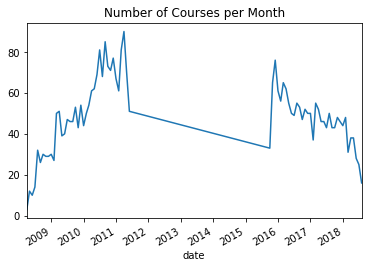

In [9]:
#Ch16_4_1d
import pandas as pd
import matplotlib.pyplot as plt

# 匯入CSV格式的檔案
df = pd.read_csv("C:\\Users\\11004076\\Documents\\Python Scripts\\FT748\\Ch16\\tutsplus2.csv", encoding="utf8")

df["date"] = df["date"].apply(lambda m: m[0:7]) 
df["date"] = pd.to_datetime(df["date"])
df2 = df.groupby("date").count()

df2["title"].plot(kind="line")
plt.title("Number of Courses per Month")

Text(0.5, 1.0, 'Number of Courses per Month')

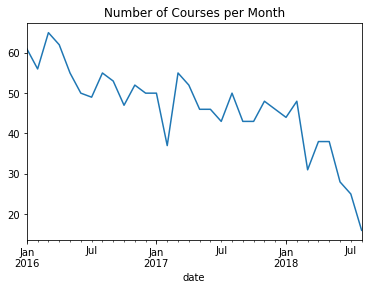

In [10]:
#Ch16_4_1e
import pandas as pd
import matplotlib.pyplot as plt

# 匯入CSV格式的檔案
df = pd.read_csv("C:\\Users\\11004076\\Documents\\Python Scripts\\FT748\\Ch16\\tutsplus2.csv", encoding="utf8")

df["date"] = df["date"].apply(lambda m: m[0:7]) 
df["year"] = df["date"].apply(lambda y: y[0:4])
df = df[df["year"] >= "2016"]
df["date"] = pd.to_datetime(df["date"])
df2 = df.groupby("date").count()

df2["title"].plot(kind="line")
plt.title("Number of Courses per Month")

In [11]:
#Ch16_4_2
import pandas as pd

# 匯入JSON格式的檔案
df = pd.read_json("C:\\Users\\11004076\\Documents\\Python Scripts\\FT748\\Ch16\\pttbeauty.json", encoding="utf-8")

df = df[df["images"] != 0]
df = df[df["author"] != "GeminiMan (GM)"]
df = df.drop(["file_urls","url","score","date","title"], axis=1)
df.to_csv("pttbeauty2.csv", index=False, encoding="utf8")
print("存入pttbeauty2.csv")

print(df.info())

print(df.head())
#df.head().to_html("Ch16_4_2.html")

存入pttbeauty2.csv
<class 'pandas.core.frame.DataFrame'>
Int64Index: 811 entries, 3 to 966
Data columns (total 4 columns):
author      811 non-null object
pushes      811 non-null int64
comments    811 non-null int64
images      811 non-null int64
dtypes: int64(3), object(1)
memory usage: 31.7+ KB
None
                author  pushes  comments  images
3           ffwind (培)     347       681       4
5      haohao1201 (豪神)       1         3      16
6  Black3831372 (男哥是我)       5         7      37
7         meokay (我可以)       5         8       3
9       maxxxxxx (馬克思)     106       115      15


C:\Users\11004076\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


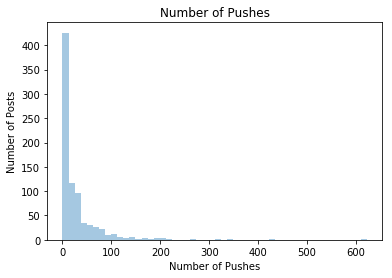

In [12]:
#Ch16_4_2a
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 匯入CSV格式的檔案
df = pd.read_csv("C:\\Users\\11004076\\Documents\\Python Scripts\\FT748\\Ch16\\pttbeauty2.csv", encoding="utf8")

sns.distplot(df["pushes"], kde=False)
plt.title("Number of Pushes")
plt.xlabel("Number of Pushes")
plt.ylabel("Number of Posts")
plt.show()

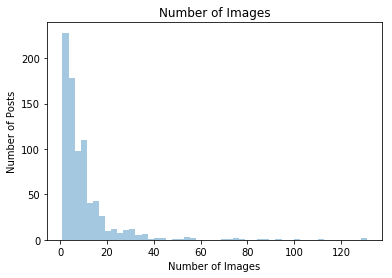

In [13]:
#Ch16_4_2b
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 匯入CSV格式的檔案
df = pd.read_csv("C:\\Users\\11004076\\Documents\\Python Scripts\\FT748\\Ch16\\pttbeauty2.csv", encoding="utf8")

sns.distplot(df["images"], kde=False)
plt.title("Number of Images")
plt.xlabel("Number of Images")
plt.ylabel("Number of Posts")
plt.show()

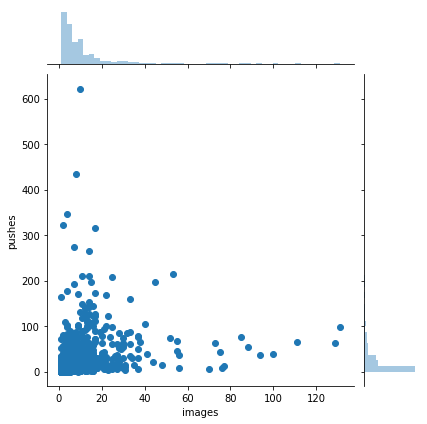

In [14]:
#Ch16_4_2c
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 匯入CSV格式的檔案
df = pd.read_csv("C:\\Users\\11004076\\Documents\\Python Scripts\\FT748\\Ch16\\pttbeauty2.csv", encoding="utf8")

sns.jointplot(x="images", y="pushes", data=df)
plt.show()

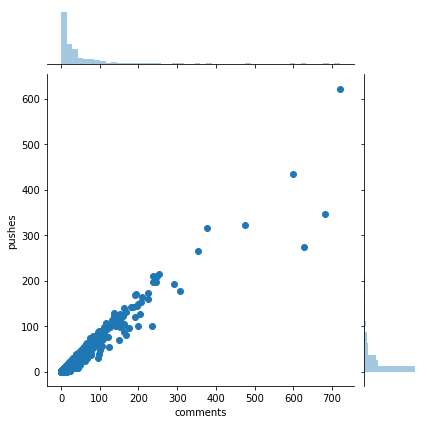

In [15]:
#Ch16_4_2d
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 匯入CSV格式的檔案
df = pd.read_csv("C:\\Users\\11004076\\Documents\\Python Scripts\\FT748\\Ch16\\pttbeauty2.csv", encoding="utf8")

sns.jointplot(x="comments", y="pushes", data=df)
plt.show()

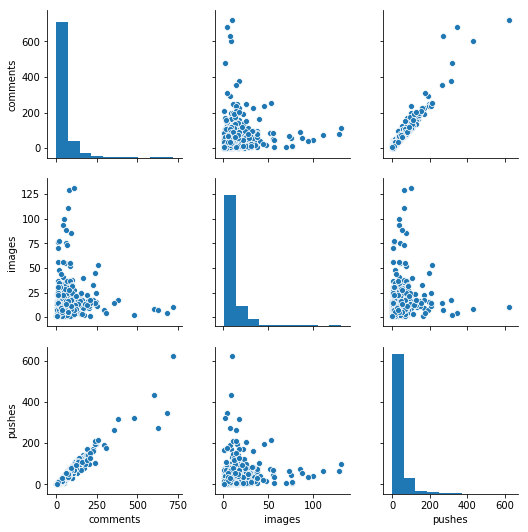

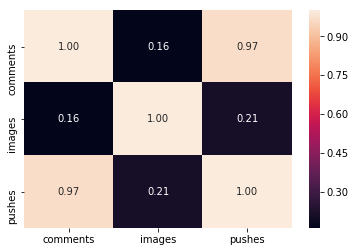

In [16]:
#Ch16_4_2e
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 匯入CSV格式的檔案
df = pd.read_csv("C:\\Users\\11004076\\Documents\\Python Scripts\\FT748\\Ch16\\pttbeauty2.csv", encoding="utf8")

sns.pairplot(df, kind="scatter", diag_kind="hist")
plt.show()

sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [17]:
#Ch16_4_3
import pandas as pd

# 匯入CSV格式的檔案
df = pd.read_csv("C:\\Users\\11004076\\Documents\\Python Scripts\\FT748\\Ch16\\stocks\\2330.TW.csv", encoding="utf8")

print(df.info())

df = df.dropna()
print(df.info())

print(df.head())
#df.head().to_html("Ch16_4_3.html")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
Date         245 non-null object
Open         243 non-null float64
High         243 non-null float64
Low          243 non-null float64
Close        243 non-null float64
Adj Close    243 non-null float64
Volume       243 non-null float64
dtypes: float64(6), object(1)
memory usage: 13.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 244
Data columns (total 7 columns):
Date         243 non-null object
Open         243 non-null float64
High         243 non-null float64
Low          243 non-null float64
Close        243 non-null float64
Adj Close    243 non-null float64
Volume       243 non-null float64
dtypes: float64(6), object(1)
memory usage: 15.2+ KB
None
         Date   Open   High    Low  Close  Adj Close      Volume
0  2017-01-03  181.5  183.5  181.0  183.0      183.0  22630000.0
1  2017-01-04  183.0  184.0  181.5  183.0      183.0  24369000.0
2  2017

In [18]:
#Ch16_4_3a
from bokeh.plotting import figure, output_file, show
from bokeh.plotting import ColumnDataSource
import pandas as pd

# 匯入CSV格式的檔案
df = pd.read_csv("C:\\Users\\11004076\\Documents\\Python Scripts\\FT748\\Ch16\\stocks\\2330.TW.csv", encoding="utf8")
df = df.dropna()

output_file("Ch16_4_3a.html")

data = ColumnDataSource(data={
        "close": df["Close"],
        "volume": df["Volume"]
        })

p = figure(title="台積電的收盤價與成交量", 
           plot_height=400, plot_width=700, 
           x_range=(min(df.Close), max(df.Close)),
           y_range=(min(df.Volume), max(df.Volume)))
p.diamond(x="close", y="volume", source=data)
p.xaxis.axis_label = "2017年收盤價"
p.yaxis.axis_label = "2017年成交量"

show(p)

In [19]:
#Ch16_4_3b
from bokeh.plotting import figure, output_file, show
from bokeh.plotting import ColumnDataSource
import pandas as pd

# 匯入CSV格式的檔案
df = pd.read_csv("C:\\Users\\11004076\\Documents\\Python Scripts\\FT748\\Ch16\\stocks\\2330.TW.csv", encoding="utf8")
df = df.dropna()
df["Date"] = pd.to_datetime(df["Date"])

output_file("Ch16_4_3b.html")

data = ColumnDataSource(data={
        "date": df["Date"],
        "close": df["Close"]
        })

p = figure(title="台積電2017年的每日收盤價",
           plot_height=400, plot_width=700,
           x_axis_type="datetime",
           x_range=(min(df.Date), max(df.Date)),
           y_range=(min(df.Close), max(df.Close)))
p.line(x="date", y="close", source=data)
p.diamond(x="date", y="close", source=data)
p.xaxis.axis_label = "2017年"
p.yaxis.axis_label = "收盤價"

show(p)

In [20]:
#Ch16_4_3c
import pandas as pd

df1 = pd.read_csv("C:\\Users\\11004076\\Documents\\Python Scripts\\FT748\\Ch16\\stocks\\2330.TW.csv", encoding="utf8")
df1 = df1.dropna()
df1["Name"] = "台積電"
df2 = pd.read_csv("C:\\Users\\11004076\\Documents\\Python Scripts\\FT748\\Ch16\\stocks\\2317.TW.csv", encoding="utf8")
df2 = df2.dropna()
df2["Name"] = "鴻海"
df3 = pd.read_csv("C:\\Users\\11004076\\Documents\\Python Scripts\\FT748\\Ch16\\stocks\\2382.TW.csv", encoding="utf8")
df3 = df3.dropna()
df3["Name"] = "廣達"
df4 = pd.read_csv("C:\\Users\\11004076\\Documents\\Python Scripts\\FT748\\Ch16\\stocks\\2454.TW.csv", encoding="utf8")
df4 = df4.dropna()
df4["Name"] = "聯發科"
df5 = pd.read_csv("C:\\Users\\11004076\\Documents\\Python Scripts\\FT748\\Ch16\\stocks\\4938.TW.csv", encoding="utf8")
df5 = df5.dropna()
df5["Name"] = "和碩"

data = pd.concat([df1, df2, df3, df4, df5])

print(data.head())
data.head().to_html("Ch16_4_3c.html")
print(data.info())

data.to_csv("tech_stocks_2017.csv", index=False, encoding="utf8")
print("存入tech_stocks_2017.csv")

         Date   Open   High    Low  Close  Adj Close      Volume Name
0  2017-01-03  181.5  183.5  181.0  183.0      183.0  22630000.0  台積電
1  2017-01-04  183.0  184.0  181.5  183.0      183.0  24369000.0  台積電
2  2017-01-05  182.0  183.5  181.5  183.5      183.5  20979000.0  台積電
3  2017-01-06  184.0  184.5  183.5  184.0      184.0  22443000.0  台積電
4  2017-01-09  184.0  185.0  183.0  184.0      184.0  18569000.0  台積電
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215 entries, 0 to 244
Data columns (total 8 columns):
Date         1215 non-null object
Open         1215 non-null float64
High         1215 non-null float64
Low          1215 non-null float64
Close        1215 non-null float64
Adj Close    1215 non-null float64
Volume       1215 non-null float64
Name         1215 non-null object
dtypes: float64(6), object(2)
memory usage: 85.4+ KB
None
存入tech_stocks_2017.csv


In [21]:
#Ch16_4_3d
from bokeh.plotting import figure, output_file, show
from bokeh.plotting import ColumnDataSource
from bokeh.models import CategoricalColorMapper
import pandas as pd

# 匯入CSV格式的檔案
df = pd.read_csv("C:\\Users\\11004076\\Documents\\Python Scripts\\FT748\\Ch16\\tech_stocks_2017.csv", encoding="utf8")

output_file("Ch16_4_3d.html")

tech_stocks = ["台積電", "鴻海", "廣達", "聯發科", "和碩"]

c_map = CategoricalColorMapper(
           factors=tech_stocks, 
           palette=["blue","green","red","yellow","gray"])

data = ColumnDataSource(data={
        "close": df["Close"],
        "volume": df["Volume"],
        "name": df["Name"]
        })

p = figure(title="蘋概科技股的收盤價與成交量", 
           plot_height=400, plot_width=700, 
           x_range=(min(df.Close), max(df.Close)),
           y_range=(min(df.Volume), max(df.Volume)))
p.diamond(x="close", y="volume", source=data,
          color={"field": "name", "transform": c_map})
p.xaxis.axis_label = "2017年收盤價"
p.yaxis.axis_label = "2017年成交量"

show(p)

In [ ]:
#Ch16_4_3e
from bokeh.plotting import figure, output_file, show
from bokeh.plotting import ColumnDataSource
from bokeh.models import CategoricalColorMapper
from bokeh.models import HoverTool
import pandas as pd

# 匯入CSV格式的檔案
df = pd.read_csv("C:\\Users\\11004076\\Documents\\Python Scripts\\FT748\\Ch16\\tech_stocks_2017.csv", encoding="utf8")

output_file("Ch16_4_3e.html")

tech_stocks = ["台積電", "鴻海", "廣達", "聯發科", "和碩"]

c_map = CategoricalColorMapper(
           factors=tech_stocks, 
           palette=["blue","green","red","yellow","gray"])

data = ColumnDataSource(data={
        "date": df["Date"],
        "close": df["Close"],
        "volume": df["Volume"],
        "name": df["Name"]
        })

p = figure(title="蘋概科技股的收盤價與成交量", 
           plot_height=400, plot_width=700, 
           x_range=(min(df.Close), max(df.Close)),
           y_range=(min(df.Volume), max(df.Volume)))

hover_tool = HoverTool(tooltips = [
             ("日期", "@date"),
             ("公司", "@name"),
             ("收盤", "@close"),
             ("成交量", "@volume")
             ])
p.add_tools(hover_tool)

p.diamond(x="close", y="volume", source=data, 
          color={"field": "name", "transform": c_map})
p.xaxis.axis_label = "2017年收盤價"
p.yaxis.axis_label = "2017年成交量"

show(p)